In [1]:
import jax
from jax import numpy as jnp, random

import numpy as np

In [3]:
m = jnp.ones((4, 4))
n = jnp.array([[1.0, 2.0, 3.0, 4.0],
               [5.0, 6.0, 7.0, 8.0]])

In [5]:
jnp.dot(n, m).block_until_ready()

DeviceArray([[10., 10., 10., 10.],
             [26., 26., 26., 26.]], dtype=float32)

In [7]:
x = np.random.normal(size=(4, 4))
jnp.dot(x, m)

DeviceArray([[ 0.45263553,  0.45263553,  0.45263553,  0.45263553],
             [-2.0426471 , -2.0426471 , -2.0426471 , -2.0426471 ],
             [ 0.51482403,  0.51482403,  0.51482403,  0.51482403],
             [-0.7884301 , -0.7884301 , -0.7884301 , -0.7884301 ]],            dtype=float32)

In [8]:
x = np.random.normal(size=(4, 4))
x = jax.device_put(x)
x

DeviceArray([[-1.4127041 ,  1.6085347 ,  1.3522464 ,  1.0449023 ],
             [ 0.17783222,  1.1720319 ,  0.95847964,  1.5528187 ],
             [ 0.90853834,  1.0746685 ,  0.12175217,  1.2544447 ],
             [-0.87096745,  0.738765  ,  0.05836585,  0.31426382]],            dtype=float32)

In [12]:
x = jnp.array([[1.0, 2.0, 3.0, 4.0],
               [5.0, 6.0, 7.0, 8.0]])
updated = jax.ops.index_update(x, (0, 0), 3.0)

In [14]:
print(x)
print(updated)

[[1. 2. 3. 4.]
 [5. 6. 7. 8.]]
[[3. 2. 3. 4.]
 [5. 6. 7. 8.]]


In [16]:
jax.ops.index_update(x, jax.ops.index[0, :], 3.0)

DeviceArray([[3., 3., 3., 3.],
             [5., 6., 7., 8.]], dtype=float32)

In [17]:
print(x)

[[1. 2. 3. 4.]
 [5. 6. 7. 8.]]


In [18]:
x.at[0, :].set(3.0)

DeviceArray([[3., 3., 3., 3.],
             [5., 6., 7., 8.]], dtype=float32)

In [19]:
print(x)

[[1. 2. 3. 4.]
 [5. 6. 7. 8.]]


In [24]:
key = random.PRNGKey(0)
key

DeviceArray([0, 0], dtype=uint32)

In [25]:
for i in range(3):
    print("Printing the random number using key: ", key, " gives: ", random.normal(key,shape=(1,))) # Boringly not that random since we use the same key

Printing the random number using key:  [0 0]  gives:  [-0.20584235]
Printing the random number using key:  [0 0]  gives:  [-0.20584235]
Printing the random number using key:  [0 0]  gives:  [-0.20584235]


In [26]:
print("old key", key, "--> normal", random.normal(key, shape=(1,)))
key, subkey = random.split(key)
print("    \---SPLIT --> new key   ", key, "--> normal", random.normal(key, shape=(1,)) )
print("             \--> new subkey", subkey, "--> normal", random.normal(subkey, shape=(1,)) )

old key [0 0] --> normal [-0.20584235]
    \---SPLIT --> new key    [4146024105  967050713] --> normal [0.14389044]
             \--> new subkey [2718843009 1272950319] --> normal [-1.2515389]


In [27]:
key, *subkeys = random.split(key, 4)
key, subkeys

(DeviceArray([3306097435, 3899823266], dtype=uint32),
 [DeviceArray([147607341, 367236428], dtype=uint32),
  DeviceArray([2280136339, 1907318301], dtype=uint32),
  DeviceArray([ 781391491, 1939998335], dtype=uint32)])

In [33]:
print(type(subkeys))

<class 'list'>


In [34]:
key = random.PRNGKey(0)
def f(x):
    return jnp.dot(x.T, x) / 2.0

v = jnp.ones((4, ))
f(v)

DeviceArray(2., dtype=float32)

In [43]:
f_grad = jax.grad(f)
v = jax.random.normal(key, (4, ))
print(v)
print(f_grad(v))

[ 1.8160859  -0.7548852   0.33988902 -0.5348355 ]
[ 1.8160859  -0.7548852   0.33988902 -0.5348355 ]


In [44]:
def f(x):
    return jnp.multiply(x, x) / 2.0

x = random.normal(key, (5, ))
v = jnp.ones(5)
print("(x,f(x))")
print((x,f(x)))
print("jax.jvp(f, (x,),(v,))")
print(jax.jvp(f, (x,),(v,)))

(x,f(x))
(DeviceArray([ 0.18784378, -1.2833427 , -0.27109176,  1.2490592 ,
              0.24446994], dtype=float32), DeviceArray([0.01764264, 0.82348424, 0.03674537, 0.7800744 , 0.02988278],            dtype=float32))
jax.jvp(f, (x,),(v,))
(DeviceArray([0.01764264, 0.82348424, 0.03674537, 0.7800744 , 0.02988278],            dtype=float32), DeviceArray([ 0.18784378, -1.2833427 , -0.27109176,  1.2490592 ,
              0.24446994], dtype=float32))


In [45]:
(val, jvp_fun) = jax.vjp(f,x)
print("x = ", x)
print("v^T Jf(x) = ", jvp_fun(jnp.ones((5,)))[0])

x =  [ 0.18784378 -1.2833427  -0.27109176  1.2490592   0.24446994]
v^T Jf(x) =  [ 0.18784378 -1.2833427  -0.27109176  1.2490592   0.24446994]


In [46]:
def selu(x, alpha=1.67, lmbda=1.05):
  return lmbda * jnp.where(x > 0, x, alpha * jnp.exp(x) - alpha)

v = random.normal(key, (1000000,))
%timeit selu(v).block_until_ready()

8.3 ms ± 401 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [47]:
selu_jit = jax.jit(selu)
%timeit selu_jit(v).block_until_ready()

2.33 ms ± 104 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Linear Regression

In [68]:
key = random.PRNGKey(0)

def make_predict(W, b):
    def predict(x):
        return jnp.dot(W, x) + b
    return predict

def make_mse(x_batched, y_batched):
    def mse(W, b):
        def squared_error(x, y):
            y_pred = make_predict(W, b) (x)
            return jnp.inner(y - y_pred, y - y_pred) / 2.0
        return jnp.mean(jax.vmap(squared_error) (x_batched, y_batched), axis=0)
    return jax.jit(mse)  # what about @jit?

In [69]:
nsamples = 20
xdim = 10
ydim = 5
std_noise = 0.1

# generate random ground truth W and b
k1, k2 = random.split(key)
W = random.normal(k1, (ydim, xdim))
b = random.normal(k2, (ydim, ))
true_predict = make_predict(W, b)

# Generate samples with additional noise
ksample, knoise = random.split(k1)
x_samples = random.normal(ksample, (nsamples, xdim))
y_samples = jax.vmap(true_predict) (x_samples) + std_noise * random.normal(knoise, (nsamples, ydim))

mse = make_mse(x_samples, y_samples)
print(x_samples.shape, y_samples.shape)

(20, 10) (20, 5)


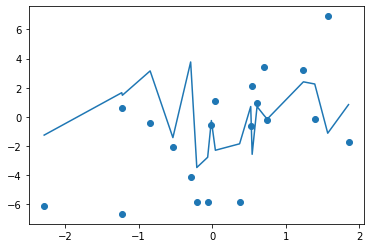

In [70]:
import matplotlib.pyplot as plt
figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)
ax.scatter(x_samples[:, 0], y_samples[:, 0])
ax.plot(jnp.sort(x_samples[:, 0]), jax.vmap(true_predict)(jnp.sort(x_samples))[:, 0])

In [79]:
# Initialize estimated W and b with zeros
What = jnp.zeros_like(W)
bhat = jnp.zeros_like(b)

alpha = 0.3
print("loss for true W, b: ", mse(W, b))
for i in range(101):
    What, bhat = What - alpha * jax.grad(mse, 0)(What, bhat), bhat - alpha * jax.grad(mse, 1)(What, bhat)
    if (i % 5 == 0):
        print("loss step {}: ".format(i), mse(What, bhat))

loss for true W, b:  0.023639776
loss step 0:  11.096583
loss step 5:  1.1743389
loss step 10:  0.32879344
loss step 15:  0.1398177
loss step 20:  0.07359564
loss step 25:  0.044152994
loss step 30:  0.029408664
loss step 35:  0.021554654
loss step 40:  0.017227935
loss step 45:  0.014798886
loss step 50:  0.013420231
loss step 55:  0.012632704
loss step 60:  0.012181091
loss step 65:  0.011921467
loss step 70:  0.011771987
loss step 75:  0.011685841
loss step 80:  0.011636151
loss step 85:  0.011607485
loss step 90:  0.011590938
loss step 95:  0.011581396
loss step 100:  0.011575882


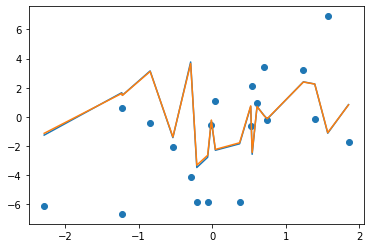

In [80]:
figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)
ax.scatter(x_samples[:, 0], y_samples[:, 0])
ax.plot(jnp.sort(x_samples[:, 0]), jax.vmap(true_predict)(jnp.sort(x_samples))[:, 0])
ax.plot(jnp.sort(x_samples[:, 0]), jax.vmap(make_predict(What, bhat))(jnp.sort(x_samples))[:, 0])

# Pytrees

In [87]:
from jax import tree_util

t = [1, {"k1": 2, "k2": (3, 4)}, 5]
t2 = [1, {"k1": 2, "k2": (3, 4)}, 23]

In [88]:
tree_util.tree_map(lambda x: x*x, t)

[1, {'k1': 4, 'k2': (9, 16)}, 25]

In [89]:
tree_util.tree_multimap(lambda x,y: x+y, t, t2)

[2, {'k1': 4, 'k2': (6, 8)}, 28]

In [95]:
key = random.PRNGKey(0)

def make_predict_pytree(params):
    def predict(x):
        return jnp.dot(params["W"], x) + params["b"]
    return predict

def make_mse_pytree(x_batched, y_batched):
    def mse(params):
        def squared_error(x, y):
            y_pred = make_predict_pytree(params)(x)
            return jnp.inner(y - y_pred, y - y_pred) / 2.0
        return jnp.mean(jax.vmap(squared_error)(x_batched, y_batched), axis=0)
    return jax.jit(mse)

In [112]:
mse_pytree = make_mse_pytree(x_samples, y_samples)
params = {"W": jnp.zeros_like(W), "b": jnp.zeros_like(b)}
jax.grad(mse_pytree)(params)

{'W': DeviceArray([[-1.9287343e+00,  4.2963755e-01,  7.1613449e-01,
                2.1056123e+00,  5.0405121e-01, -2.4983375e+00,
               -6.3854140e-01, -2.2620211e+00, -1.3365202e+00,
               -2.0426035e-01],
              [ 1.1999466e+00, -9.4563603e-01, -1.0878402e+00,
               -7.0340675e-01,  3.3224615e-01,  1.7538788e+00,
               -7.1916544e-01,  1.0927428e+00, -1.4491031e+00,
                5.9715623e-01],
              [-1.4826506e+00, -7.6116538e-01,  2.2319874e-01,
               -3.0391946e-01,  3.0397055e+00, -3.8419434e-01,
               -1.8290073e+00, -2.3353367e+00, -1.1087127e+00,
               -7.7453983e-01],
              [ 8.2374448e-01, -9.9650621e-01, -7.6030117e-01,
                6.3919234e-01, -6.0864821e-02, -1.0859716e+00,
                1.2923400e+00, -4.9342912e-01, -1.4710277e-03,
                1.2977618e+00],
              [-4.5656449e-01, -1.3063039e-01, -3.9179015e-01,
                2.1743820e+00, -5.3948678e-02,  

In [113]:
print("loss for true W, b: ", mse_pytree({"W": W, "b": b}))

for i in range(101):
    params = jax.tree_multimap(
        lambda x, y: x - alpha * y,
        params,
        jax.grad(mse_pytree)(params)
    )
    if i % 5 == 0:
        print("current loss: ", mse_pytree(params))

loss for true W, b:  0.023639776
current loss:  11.096583
current loss:  1.1743389
current loss:  0.32879344
current loss:  0.1398177
current loss:  0.07359564
current loss:  0.044152994
current loss:  0.029408664
current loss:  0.021554654
current loss:  0.017227935
current loss:  0.014798886
current loss:  0.013420231
current loss:  0.012632704
current loss:  0.012181091
current loss:  0.011921467
current loss:  0.011771987
current loss:  0.011685841
current loss:  0.011636151
current loss:  0.011607485
current loss:  0.011590938
current loss:  0.011581396
current loss:  0.011575882


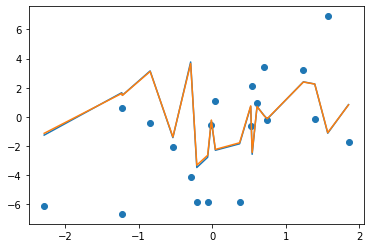

In [114]:
figure = plt.figure()
ax = figure.add_subplot(1, 1, 1)
ax.scatter(x_samples[:, 0], y_samples[:, 0])
ax.plot(jnp.sort(x_samples[:, 0]), jax.vmap(true_predict)(jnp.sort(x_samples))[:, 0])
ax.plot(jnp.sort(x_samples[:, 0]), jax.vmap(make_predict(params["W"], params["b"]))(jnp.sort(x_samples))[:, 0])

In [115]:
# done! :)